<a href="https://colab.research.google.com/github/Fariz-prog/Data_Analyst_Portofolio/blob/main/Sales_Data_Marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Tentukan path lengkap ke file
file_path = r'Online Sales Data.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


In [ ]:
# Encoding variabel kategorikal menggunakan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Product Category', 'Region', 'Payment Method'], drop_first=True)

# Memisahkan fitur (X) dan target (y) untuk Total Revenue
X_total_revenue = data_encoded.drop(columns=['Transaction ID', 'Date', 'Product Name', 'Total Revenue'])
y_total_revenue = data_encoded['Total Revenue']

# Membagi data menjadi training dan testing set
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_total_revenue, y_total_revenue, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model_rev = LinearRegression()
model_rev.fit(X_train_rev, y_train_rev)

# Prediksi menggunakan model yang telah dilatih
y_pred_rev = model_rev.predict(X_test_rev)

# Evaluasi model
mse_rev = mean_squared_error(y_test_rev, y_pred_rev)
r2_rev = r2_score(y_test_rev, y_pred_rev)

print(f"Mean Squared Error (MSE) untuk Total Revenue: {mse_rev}")
print(f"R-squared (R²) untuk Total Revenue: {r2_rev}")

# Prediksi Total Revenue untuk data baru
data_baru = pd.DataFrame({
    'Units Sold': [3],
    'Unit Price': [100],
    'Product Category_Books': [0],
    'Product Category_Clothing': [0],
    'Product Category_Electronics': [1],
    'Product Category_Home Appliances': [0],
    'Product Category_Sports': [0],
    'Region_Europe': [0],
    'Region_North America': [1],
    'Payment Method_Debit Card': [0],
    'Payment Method_PayPal': [1]
})

prediksi_revenue = model_rev.predict(data_baru)
print(f"Prediksi Total Revenue untuk data baru: {prediksi_revenue[0]}")

Mean Squared Error (MSE) untuk Total Revenue: 16644.593700850615
R-squared (R²) untuk Total Revenue: 0.9088983672444765
Prediksi Total Revenue untuk data baru: 344.2753951591862


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

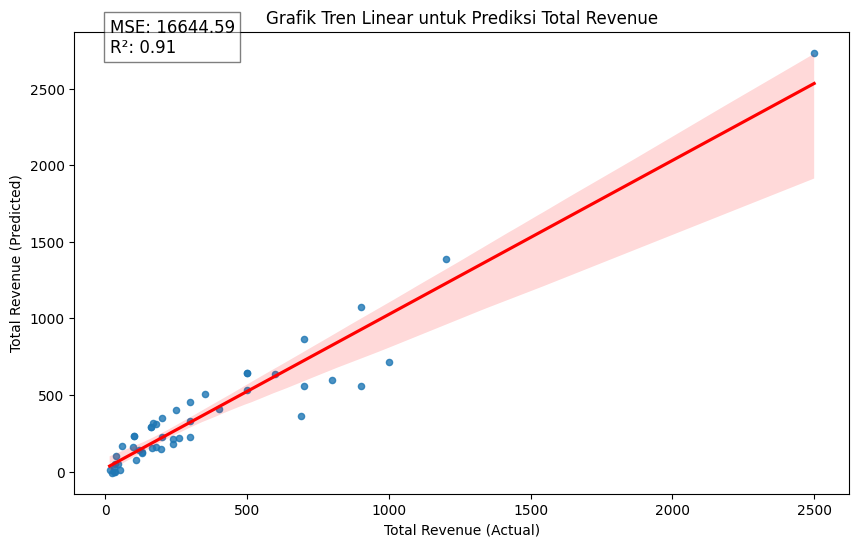

In [ ]:
# Membuat grafik tren linear antara prediksi dan nilai sebenarnya
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_rev, y=y_pred_rev, line_kws={"color":"red"}, scatter_kws={"s":20})
plt.title('Grafik Tren Linear untuk Prediksi Total Revenue')
plt.xlabel('Total Revenue (Actual)')
plt.ylabel('Total Revenue (Predicted)')

# Menampilkan MSE dan R-squared pada grafik
plt.text(min(y_test_rev), max(y_pred_rev), f'MSE: {mse_rev:.2f}\nR²: {r2_rev:.2f}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()